In [55]:
%pip install rasterio matplotlib
%pip install fiona
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 3.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


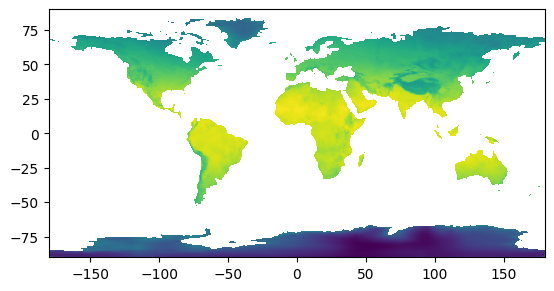

<Axes: >

In [21]:
import rasterio
from rasterio.plot import show

# Caminho para o arquivo .tiff no seu Google Drive ou diretório local
tiff_path = '../data/wc2.1_5m_bio_1.tif'

# Abrir o arquivo .tiff com rasterio
dataset = rasterio.open(tiff_path)

# Visualizar o raster
show(dataset)


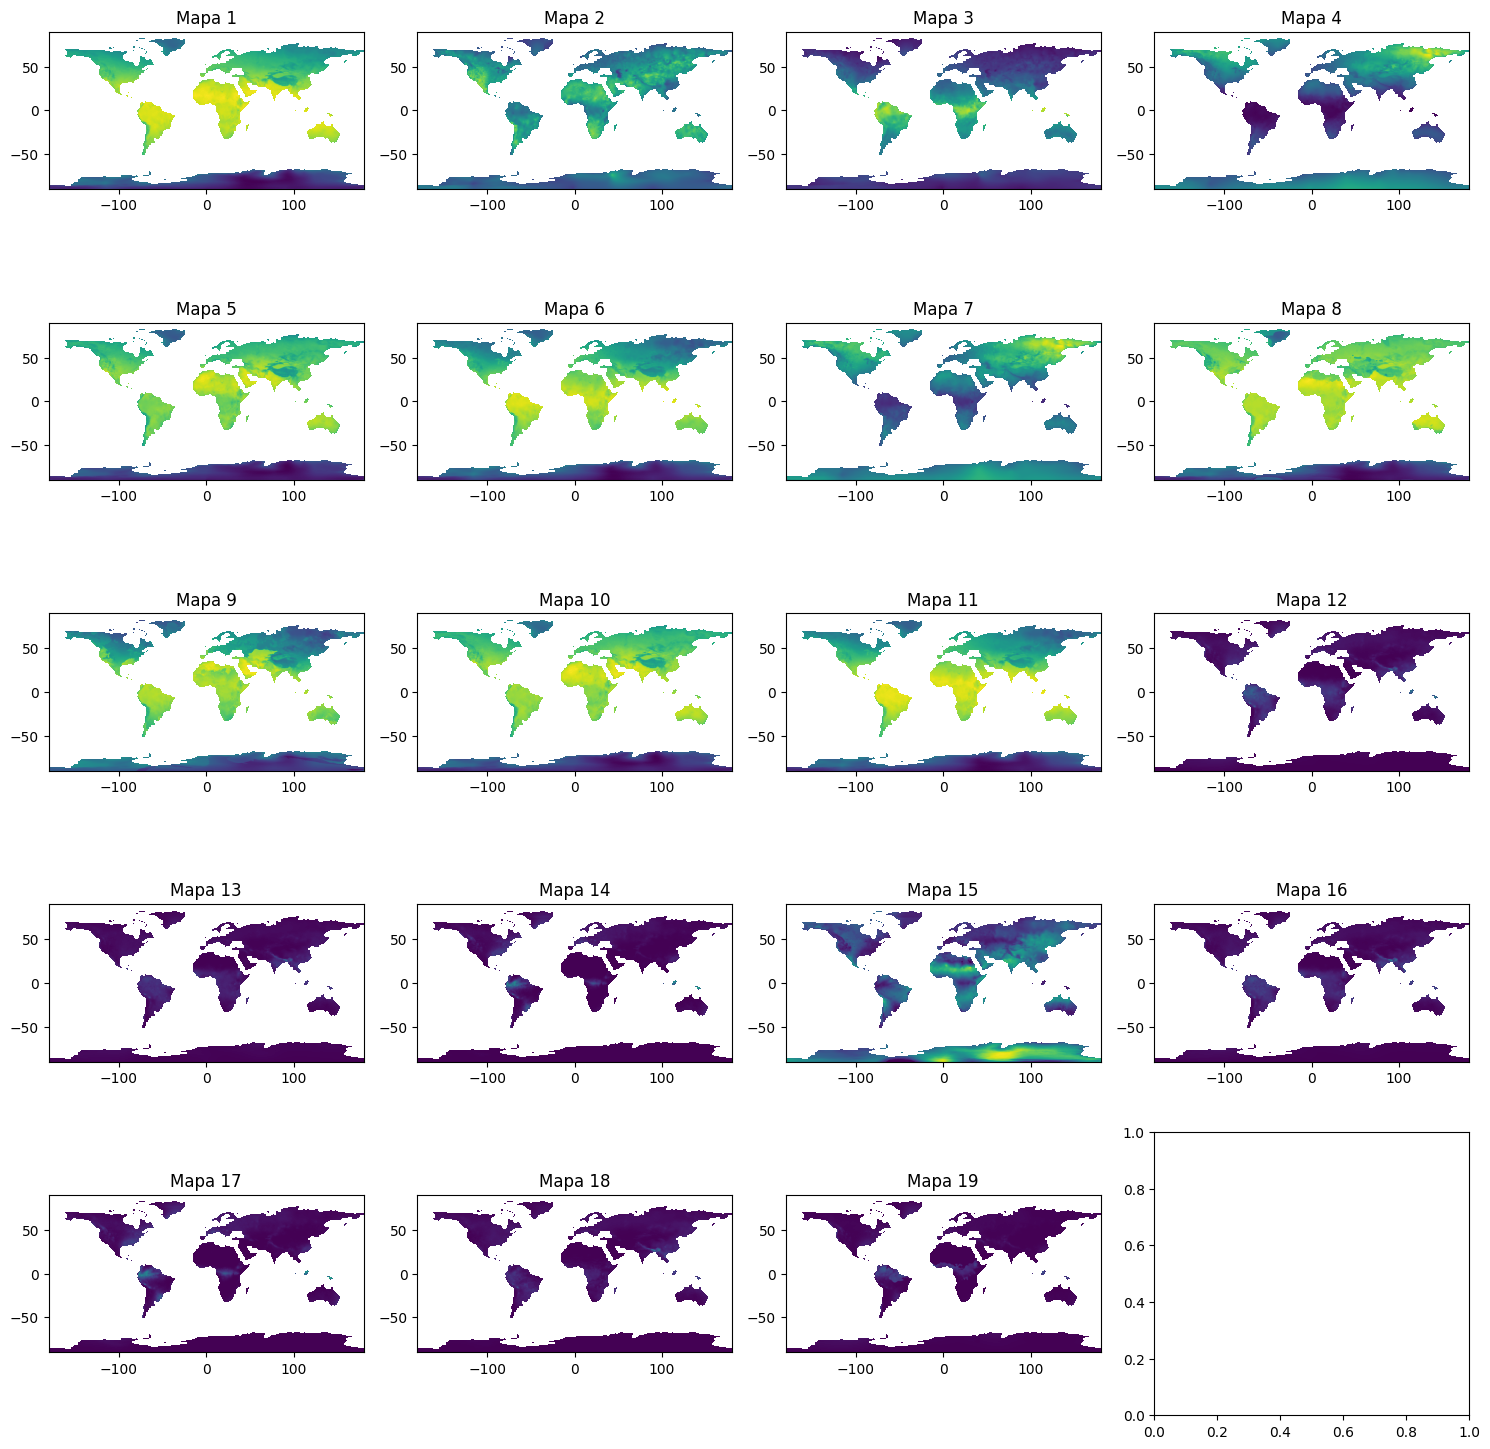

In [22]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Caminho base para o arquivo .tiff no seu Google Drive ou diretório local
base_path = '../data/wc2.1_5m_bio_{}.tif'

# Configurar o layout da figura
num_rows = 5  # Número de linhas
num_cols = 4  # Número de colunas
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterar sobre os arquivos de 1 a 19
for i in range(1, 20):
    # Formatar o caminho do arquivo
    tiff_path = base_path.format(i)

    # Abrir o arquivo .tiff com rasterio
    dataset = rasterio.open(tiff_path)

    # Plotar o raster na subfigura correspondente
    row = (i - 1) // num_cols
    col = (i - 1) % num_cols
    ax = axes[row, col]
    show(dataset, ax=ax)
    ax.set_title(f'Mapa {i}')

# Ajustar o layout da figura
plt.tight_layout()
plt.show()


In [91]:
import fiona.transform
import rasterio.sample

bioclim_variables = [
    ("BIO1", "Annual Mean Temperature"),
    ("BIO2", "Mean Diurnal Range (Mean of monthly (max temp - min temp))"),
    ("BIO3", "Isothermality (BIO2/BIO7) (×100)"),
    ("BIO4", "Temperature Seasonality (standard deviation ×100)"),
    ("BIO5", "Max Temperature of Warmest Month"),
    ("BIO6", "Min Temperature of Coldest Month"),
    ("BIO7", "Temperature Annual Range (BIO5-BIO6)"),
    ("BIO8", "Mean Temperature of Wettest Quarter"),
    ("BIO9", "Mean Temperature of Driest Quarter"),
    ("BIO10", "Mean Temperature of Warmest Quarter"),
    ("BIO11", "Mean Temperature of Coldest Quarter"),
    ("BIO12", "Annual Precipitation"),
    ("BIO13", "Precipitation of Wettest Month"),
    ("BIO14", "Precipitation of Driest Month"),
    ("BIO15", "Precipitation Seasonality (Coefficient of Variation)"),
    ("BIO16", "Precipitation of Wettest Quarter"),
    ("BIO17", "Precipitation of Driest Quarter"),
    ("BIO18", "Precipitation of Warmest Quarter"),
    ("BIO19", "Precipitation of Coldest Quarter")
]

def reproject_coords(src_crs, dst_crs, coords):
    xs = [c[0] for c in coords]
    ys = [c[1] for c in coords]
    xs, ys = fiona.transform.transform(src_crs, dst_crs, xs, ys)
    return [[x,y] for x,y in zip(xs, ys)]

def get_bioclimate_values(coords=[]):
        
    results = [{
        "lon": coord[0],
        "lat": coord[1]
    } for coord in coords]
    
    

    
    for layer, (alias, name) in enumerate(bioclim_variables):
        
        with rasterio.open(f'../data/wc2.1_5m_bio_{layer+1}.tif') as dataset:
            src_crs = 'EPSG:4326'
            dst_crs = dataset.crs.to_epsg()
            # dst_crs = dataset.crs.to_wkt()  # 'PROJCS["World_Mollweide",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS    84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mollweide"],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'


            # [longitude, latitude] not [lat, lon]...
            new_coords = reproject_coords(src_crs, dst_crs, coords)

            values = list(rasterio.sample.sample_gen(dataset, new_coords))

            
            for idx, ((lon, lat), value )in enumerate(zip(coords, values)):
                print(lon, lat, value[0])  # value[0] == band 1 value at lon, lat
                results[idx-1][f"{alias}"] = value[0]
            
    return results
            



In [92]:
import pandas as pd

In [93]:
araucarias_df = pd.read_csv('../data/csv/araucarias.csv')

In [94]:
araucarias_df

,taxonKey,genus,species,decimalLatitude,decimalLongitude,country,coordinateUncertaintyInMeters,year,month,day
0,2684940,Araucaria,Araucaria angustifolia,-29.582904,-51.157494,Brazil,NaN,2023.0,1.0,4.0
1,2684940,Araucaria,Araucaria angustifolia,-28.444145,-50.024535,Brazil,3526.0,2023.0,1.0,21.0
2,2684940,Araucaria,Araucaria angustifolia,-23.457291,-46.772035,Brazil,2984.0,2023.0,1.0,29.0
3,2684940,Araucaria,Araucaria angustifolia,-20.344183,-40.676112,Brazil,NaN,2023.0,1.0,12.0
4,2684940,Araucaria,Araucaria angustifolia,-25.496319,-48.981167,Brazil,202.0,2023.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...
948,2684940,Araucaria,Araucaria angustifolia,-23.046254,-48.639063,Brazil,NaN,NaN,NaN,NaN
949,2684940,Araucaria,Araucaria angustifolia,-23.065583,-48.631428,Brazil,NaN,NaN,NaN,NaN
950,2684940,Araucaria,Araucaria angustifolia,-23.475278,-45.868056,Brazil,NaN,NaN,NaN,NaN
951,2684958,Araucaria,Araucaria angustifolia,-25.000000,-52.000000,Brazil,NaN,NaN,NaN,NaN


In [95]:
def get_coords(df):
    coords = []
    for idx, row in df.iterrows():
        coords.append([row.get("decimalLongitude"), row.get("decimalLatitude")])
    return coords

In [96]:
get_coords(araucarias_df)

[[-51.157494, -29.582904],
 [-50.024535, -28.444145],
 [-46.772035, -23.457291],
 [-40.676112, -20.344183],
 [-48.981167, -25.496319],
 [-54.508694, -25.551132],
 [-50.9268, -27.018258],
 [-50.925322, -27.015767],
 [-43.925216, -21.718944],
 [-51.464253, -25.348725],
 [-52.073827, -29.238835],
 [-51.09292, -25.148065],
 [-52.71007, -26.146604],
 [-45.146172, -23.33649],
 [-49.135666, -26.998258],
 [-45.602043, -22.767029],
 [-42.485662, -22.39473],
 [-51.179742, -29.022775],
 [-43.916011, -21.953646],
 [-50.743558, -29.497638],
 [-54.576098, -25.559178],
 [-49.238531, -25.441119],
 [-50.77715, -29.512755],
 [-45.97211, -22.88582],
 [-54.485205, -25.608472],
 [-41.874054, -20.44788],
 [-51.052167, -29.351883],
 [-49.0802, -25.548503],
 [-49.218697, -25.43637],
 [-49.299609, -25.312815],
 [-49.259512, -25.361867],
 [-49.391255, -25.400655],
 [-50.435226, -29.792325],
 [-50.786575, -29.498258],
 [-50.78303, -29.494775],
 [-48.925682, -27.056591],
 [-49.823608, -27.397825],
 [-47.144566, -

In [97]:
bioclimate_araucaria_df = pd.DataFrame(get_bioclimate_values(get_coords(araucarias_df)))

-51.157494 -29.582904 18.331
-50.024535 -28.444145 15.182917
-46.772035 -23.457291 18.413834
-40.676112 -20.344183 19.48129
-48.981167 -25.496319 17.037125
-54.508694 -25.551132 21.296291
-50.9268 -27.018258 15.330791
-50.925322 -27.015767 15.330791
-43.925216 -21.718944 17.999208
-51.464253 -25.348725 16.6255
-52.073827 -29.238835 18.026167
-51.09292 -25.148065 17.89475
-52.71007 -26.146604 17.585083
-45.146172 -23.33649 18.8375
-49.135666 -26.998258 19.189167
-45.602043 -22.767029 15.350625
-42.485662 -22.39473 16.683542
-51.179742 -29.022775 16.262917
-43.916011 -21.953646 17.941875
-50.743558 -29.497638 17.458166
-54.576098 -25.559178 21.296291
-49.238531 -25.441119 18.050167
-50.77715 -29.512755 18.834667
-45.97211 -22.88582 15.673667
-54.485205 -25.608472 20.80925
-41.874054 -20.44788 17.041084
-51.052167 -29.351883 16.685167
-49.0802 -25.548503 17.464542
-49.218697 -25.43637 18.050167
-49.299609 -25.312815 16.825624
-49.259512 -25.361867 17.249374
-49.391255 -25.400655 16.979708

In [98]:
bioclimate_araucaria_df.to_excel("../data/excel/bioclimate_araucaria.xlsx")
pd.DataFrame(bioclim_variables).to_excel("../data/excel/siglas.xlsx")